
# ***Importemos lo que necesitamos***



In [1]:
pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd #para manipular data
import numpy as np #para el trabajo numerico 
import matplotlib.pyplot as plt # para plotear
import powerlaw

In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [4]:
cd /gdrive/Shareddrives/GENSyR /CSCH (Ciencias Sociales Computacionales Heterodoxas)/Carpeta de trabajo/Redes de transporte CR

[Errno 2] No such file or directory: '/gdrive/Shareddrives/GENSyR /CSCH (Ciencias Sociales Computacionales Heterodoxas)/Carpeta de trabajo/Redes de transporte CR'
/gdrive


In [5]:
ls

MyDrive/  Shareddrives/


In [6]:
all_data = pd.read_excel('Transcripción de accionistas - CTP (2018).xlsx')

FileNotFoundError: ignored

# ***Seleccionemos lo que necesitamos***

In [ ]:
all_data.keys()

In [ ]:
datos = all_data[['Nombre de la Persona Jurídica','bbbb','Ruta','% Acciones de las que es dueño','Unnamed: 8']]

In [ ]:
datos = datos[datos['Ruta'] != 'SIN NÚMERO'] #
datos = datos[datos['% Acciones de las que es dueño'] != '#VALUE!']
#datos = datos[datos['Unnamed: 8'] == 'Persona Jurídica']
datos = datos.dropna()
datos = datos[datos['% Acciones de las que es dueño'] != 'No indica']
datos

# ***Contemos las rutas***

In [ ]:
for i in list(datos['Ruta'].keys()):
  contador = 0
  if type(datos['Ruta'][i]) == str:
    contador = 1
    for j in range(len(datos['Ruta'][i])):
      if datos['Ruta'][i][j] == '/' or datos['Ruta'][i][j] == ',':
        contador = contador +1
  else:
    contador = 1
  datos['Ruta'][i] = contador
datos


,Nombre de la Persona Jurídica,bbbb,Ruta,% Acciones de las que es dueño,Unnamed: 8
0,Cooperativa de Transporte Remunerado de Person...,ABIGAIL GUADALUPE SALAS MOLINA,2,No aplica,Mujer
1,Persona Jurídica Transportes Unidos San Antoni...,ABRAHAM JOSUE ARAYA PIEDRA,1,5,Hombre
2,"Reyna del Campo, Sociedad Anónima",ADELA MARIA REYES GUTIERREZ,3,30,Mujer
3,Autotransportes Santa Barbara Sociedad de Resp...,ADEMAR GERARDO VIQUEZ UGALDE,1,5,Hombre
4,Cooperativa de Transportes de Sabanilla y San ...,ADOLFO RAFAEL DE JESUS SOTO CARVAJAL,1,No aplica,Hombre
...,...,...,...,...,...
1468,Cooperativa de Transportes de Sabanilla y San ...,ZAIDA GONZALEZ SOTO,1,No aplica,Mujer
1469,Cooperativa de Usuarios y Gestores de Transpor...,ZEIDY DENISSE POVEDA PICADO,2,2.12766,Mujer
1470,Cooperativa de Transporte Remunerado de Person...,ZIANNY MARLENE RODRIGUEZ ACEVEDO,2,No aplica,Mujer
1471,Cooperativa de Transportistas de Paraíso R.L.,ZOILA ROSA SOLANO MARTINEZ,5,No aplica,Mujer


# ***Seleccionemos solo a los accionistas y calculemos cuantas rutas concentran***

In [ ]:
datos = datos.drop(datos[datos['% Acciones de las que es dueño']== 'No aplica'].index) #seleccionamos solo accionistas
acciones = np.array(list(datos['% Acciones de las que es dueño'])) #aca vamos a calcular el indice de apropiacion de rutas
rutas = np.array(list(datos['Ruta']))
indice_rutas = acciones*0.01*rutas
datos2 = datos.assign(indice=indice_rutas) #agregamos el indice al dataframe
datos2 # visualizamos el dataframe

In [ ]:
datos3 = datos2.groupby(['bbbb']).agg({'indice': 'sum'}) #agrupamos a los repetidos
#SAQUEMOS LA DISTRIBUCION
indices_ruta = datos3.values
histograma = np.histogram(indices_ruta, bins= 40)
valores = histograma[1][0:len(histograma[1])-1]
cantidad = histograma[0]
cantidad = cantidad/np.sum(cantidad)

# ***Ajustemos la distribución***


In [7]:
#ajustemos los datos
results = powerlaw.Fit(cantidad)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
lista = []
for i in range(1,41):
  a = i**(-alpha)
  lista.append(a)
lista = np.array(lista)
total = np.sum(lista)
lista = lista/total
print('exponente',alpha)
print('xmin',xmin)
print('cte normalizacion', 1/(alpha-1))
print(total)

NameError: ignored

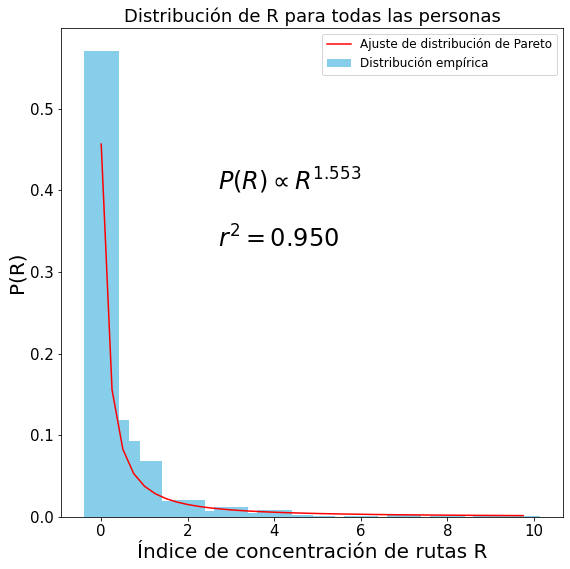

In [ ]:
#Grafiquemos los datos
import matplotlib
plt.figure(figsize = (9,9))
plt.title('Distribución de R para todas las personas', fontsize=18)
#plt.plot(valores,cantidad,marker = '+', ls='none', label= 'Distribución empírica', color = 'k')
plt.bar(valores,cantidad, label = 'Distribución empírica', color = 'skyblue')
plt.plot(valores,lista, label = 'Ajuste de distribución de Pareto', color = 'red')
plt.xlabel('Índice de concentración de rutas R', fontsize = 20)
plt.ylabel('P(R)', fontsize = 20)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
plt.legend(loc=1, fontsize = 12)
plt.text(2.7,0.4,r'$ P(R) \propto R^{1.553}   $',fontsize=24)
plt.text(2.7,0.33,r'$ r^2 = 0.950   $',fontsize=24)
plt.savefig('Distribución de R para todas las personas', dpi = 300)

In [ ]:
import sklearn.metrics as skm
r2 = skm.r2_score(cantidad,lista)
print(r2)

0.9503653945815508


# ***Calculemos índices de concentración***

In [ ]:
pip install concentrationMetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from concentrationMetrics import Index
indices = Index()
hhi= indices.hhi(cantidad)
gini = indices.gini(cantidad)
shannon = indices.shannon(cantidad)
cr = indices.cr(cantidad,n = 3)
theil = indices.theil(cantidad)
entropy = indices.gei(cantidad, alpha =0 )
print(entropy,'entropy')
print(theil,'theil')
print(cr,'concentration ratio')
print(hhi,' hhi')
print(gini, 'gini')
print(shannon, 'shannon')

1.6555480082174547 entropy
1.511207973464815 theil
0.7820163487738419 concentration ratio
0.33940886802664677  hhi
0.891008174386921 gini
1.6242862424643347 shannon


In [ ]:
import sklearn.metrics as skm
r2 = skm.r2_score(cantidad,lista)
print(r2)

0.9503653945815508


# ***Construcción de la red de relaciones económicas***

In [ ]:
#miremos quienes son coaccionistas de un consesionario
lista = []
for i in datos2['bbbb']:
  vecinos = []
  enlaces = []
  consesionarios = datos2[datos2['bbbb'] ==i]
  for j in consesionarios['Nombre de la Persona Jurídica']:
    personas = datos2[datos2['Nombre de la Persona Jurídica'] == j]
    acc = personas[personas['bbbb'] == i]
    acc1 = acc['% Acciones de las que es dueño'].values[0]*0.01
    personas = personas[personas['bbbb']!= i]
    for k in personas['bbbb']:
      acc = personas[personas['bbbb'] == k]
      acc2 = acc['% Acciones de las que es dueño'].values[0]*0.01
      enlace = acc1*acc2/0.25
      vecinos.append(k)
      enlaces.append(enlace)
  dicc = {'Nodo1':i, 'Nodo2':vecinos, 'enlace':enlaces}
  dataframe = pd.DataFrame(dicc)
  if dataframe.empty == False:
    lista.append(dataframe)

In [ ]:
#agrupemos la fuerza de los vinculos
lista2 = lista.copy()
for i in range(len(lista2)):
  dataframe = lista2[i]
  nodo1 = dataframe['Nodo1'][0]
  dataframe2 = dataframe.groupby(['Nodo2']).agg({'enlace': 'sum'}) #agrupamos a los repetidos
  dataframe2['Nodo1'] = nodo1
  lista2[i] = dataframe2


In [ ]:
#unamos todos los dataframes
ladyacencia = pd.concat(lista2)
ladyacencia.reset_index(inplace = True)
ladyacencia

,Nodo2,enlace,Nodo1
0,DIEGO ALONSO ARAYA PIEDRA,0.010000,ABRAHAM JOSUE ARAYA PIEDRA
1,ELPIDIO ARAYA TORRES,0.022857,ABRAHAM JOSUE ARAYA PIEDRA
2,JOHN ESTEBAN ARAYA PIEDRA,0.017143,ABRAHAM JOSUE ARAYA PIEDRA
3,JUAN CARLOS DE JESUS MARTINEZ CASTILLO,0.000000,ABRAHAM JOSUE ARAYA PIEDRA
4,JUAN CARLOS DE LOS ANGELES CALDERON AGUILAR,0.014286,ABRAHAM JOSUE ARAYA PIEDRA
...,...,...,...
6201,ELIZABETH PEREZ GONZALEZ,0.064000,ZULAY GONZALEZ BARRANTES
6202,ESTEBAN PEREZ GONZALEZ,0.064000,ZULAY GONZALEZ BARRANTES
6203,GABRIEL PEREZ ROJAS,0.326400,ZULAY GONZALEZ BARRANTES
6204,JOSE ARTURO PEREZ GONZALEZ,0.019200,ZULAY GONZALEZ BARRANTES


In [ ]:
#Construyamos la red
import networkx as nx
grafo = nx.from_pandas_edgelist(ladyacencia, source ='Nodo1', target = 'Nodo2', edge_attr='enlace')

In [ ]:
#Guardemos como propiedad de los nodos al indice de concentración de rutas
indices2 = datos2[['bbbb','indice']]
contador = 0
adyacencia = nx.to_numpy_array(grafo)
for i in grafo.nodes():
  grafo.nodes[i]['I.apropiacion de ruta'] = indices2[indices2['bbbb'] == i]['indice'].values[0]
  grafo.nodes[i]['fuerza'] = np.sum(adyacencia[contador])
  contador = contador +1 
nx.write_graphml(grafo,'grafo_coaccionistas.graphml')

# ***Red de relaciones familiares***



In [ ]:
otradata = pd.read_excel('Visualización de accionistas y juntas directivas - Semanario Universidad.xlsx', sheet_name = 1)
otradata = otradata[['Source','Type','Target']]
otradata = otradata.dropna()

ladyacencia['Nodo1'] = ladyacencia['Nodo1'].str.lower()
ladyacencia['Nodo2'] = ladyacencia['Nodo2'].str.lower()

otradata['Source'] = otradata['Source'].str.lower()
otradata['Target'] = otradata['Target'].str.lower()


In [ ]:
nombres = ladyacencia.groupby(['Nodo1']).mean()
nombres = nombres.reset_index()
nombres = nombres['Nodo1']
nombres

0         abraham josue araya piedra
1        adela maria reyes gutierrez
2       ademar gerardo viquez ugalde
3        adonay alberto campos araya
4             adonay campos castillo
                   ...              
692      yesenia maria sibaja davila
693       yetty maria zarate sanchez
694    yunke nuboso de la balsa s.a.
695      zeidy denisse poveda picado
696         zulay gonzalez barrantes
Name: Nodo1, Length: 697, dtype: object

In [ ]:

for i in nombres:
  dataframe = otradata[otradata['Source'] == i]
  for j in dataframe['Type'].index:
    if dataframe['Type'][j] =='Hijo' or dataframe['Type'][j] =='Hermano(a)' or dataframe['Type'][j] =='Madre' or dataframe['Type'][j] =='Padre':
      ladyacencia['enlace'][j] = ladyacencia['enlace'][j] + 1
    if dataframe['Type'][j] == 'Conyuge':
      ladyacencia['enlace'][j] = ladyacencia['enlace'][j] +1.3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
ladyacencia

,Nodo2,enlace,Nodo1
0,diego alonso araya piedra,1.010000,abraham josue araya piedra
1,elpidio araya torres,1.022857,abraham josue araya piedra
2,john esteban araya piedra,1.017143,abraham josue araya piedra
3,juan carlos de jesus martinez castillo,1.000000,abraham josue araya piedra
4,juan carlos de los angeles calderon aguilar,0.014286,abraham josue araya piedra
...,...,...,...
6201,elizabeth perez gonzalez,0.064000,zulay gonzalez barrantes
6202,esteban perez gonzalez,0.064000,zulay gonzalez barrantes
6203,gabriel perez rojas,0.326400,zulay gonzalez barrantes
6204,jose arturo perez gonzalez,0.019200,zulay gonzalez barrantes


In [ ]:
#Construyamos la red
import networkx as nx
grafo2 = nx.from_pandas_edgelist(ladyacencia, source ='Nodo1', target = 'Nodo2', edge_attr='enlace')

#Guardemos como propiedad de los nodos al indice de concentración de rutas
indices2 = datos2[['bbbb','indice']]
indices2['bbbb'] = indices2['bbbb'].str.lower()
contador = 0
adyacencia = nx.to_numpy_array(grafo2)
for i in grafo2.nodes():
  grafo2.nodes[i]['I.apropiacion de ruta'] = indices2[indices2['bbbb'] == i]['indice'].values[0]
  grafo2.nodes[i]['fuerza'] = np.sum(adyacencia[contador])
  contador = contador +1 
nx.write_graphml(grafo2,'grafo_coaccionistas_confamilia.graphml',edge_id_from_attribute = 'enlace')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
grafo3 = nx.Graph()
for i in grafo2.edges():
  if grafo2[i[0]][i[1]]['enlace'] == 0:
    grafo2[i[0]][i[1]]['enlace'] = 0.01
  grafo3.add_edge(i[0], i[1], weight = grafo2[i[0]][i[1]]['enlace'])

for i in grafo3.nodes():
  grafo3.nodes[i]['I.apropiacion de ruta'] = indices2[indices2['bbbb'] == i]['indice'].values[0]
  contador = contador +1 

nx.write_graphml(grafo3,'grafo_coaccionistas_confamilia2.graphml',edge_id_from_attribute = 'enlace')

In [ ]:
nx.draw_kamada_kawai(grafo3)